# Necessary Package Imports

In [44]:
# to remove matplotlib font warnings, try to avoid the specific warning instead of this blanket suppression

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [1]:
# get all available csv files
import glob

print(glob.glob("*.csv"))

['preproctrain.csv', 'preproc3.csv', 'preproctest.csv', 'preproc2.csv']


In [6]:
# all packages

import numpy as np
import pandas as pd
from IPython.display import display, HTML
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
dfc = pd.read_csv("preproc2.csv")
dfc.drop("Unnamed: 0", inplace=True, axis=1)
dfc.head()

,Unnamed: 0,Patient Id,Blood cell count (mcL),White Blood cell count (thousand per microliter),Patient Age,Genes in mother's side,Genes in father's side,Maternal gene,Paternal gene,Mother's age,...,No. of previous abortion,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,0,PID0x6418,4.760603,9.857562,2.0,1.0,0.0,1.0,0.0,37.0,...,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,1,PID0x25d5,4.910669,5.522560,4.0,1.0,1.0,0.0,0.0,40.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0
2,2,PID0x4a82,4.893297,5.966703,6.0,1.0,0.0,0.0,0.0,41.0,...,4.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,3,PID0x4ac8,4.705280,7.919321,12.0,1.0,0.0,1.0,0.0,21.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,4,PID0x1bf7,4.720703,4.098210,11.0,1.0,0.0,0.0,1.0,32.0,...,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Data Preprocessing section

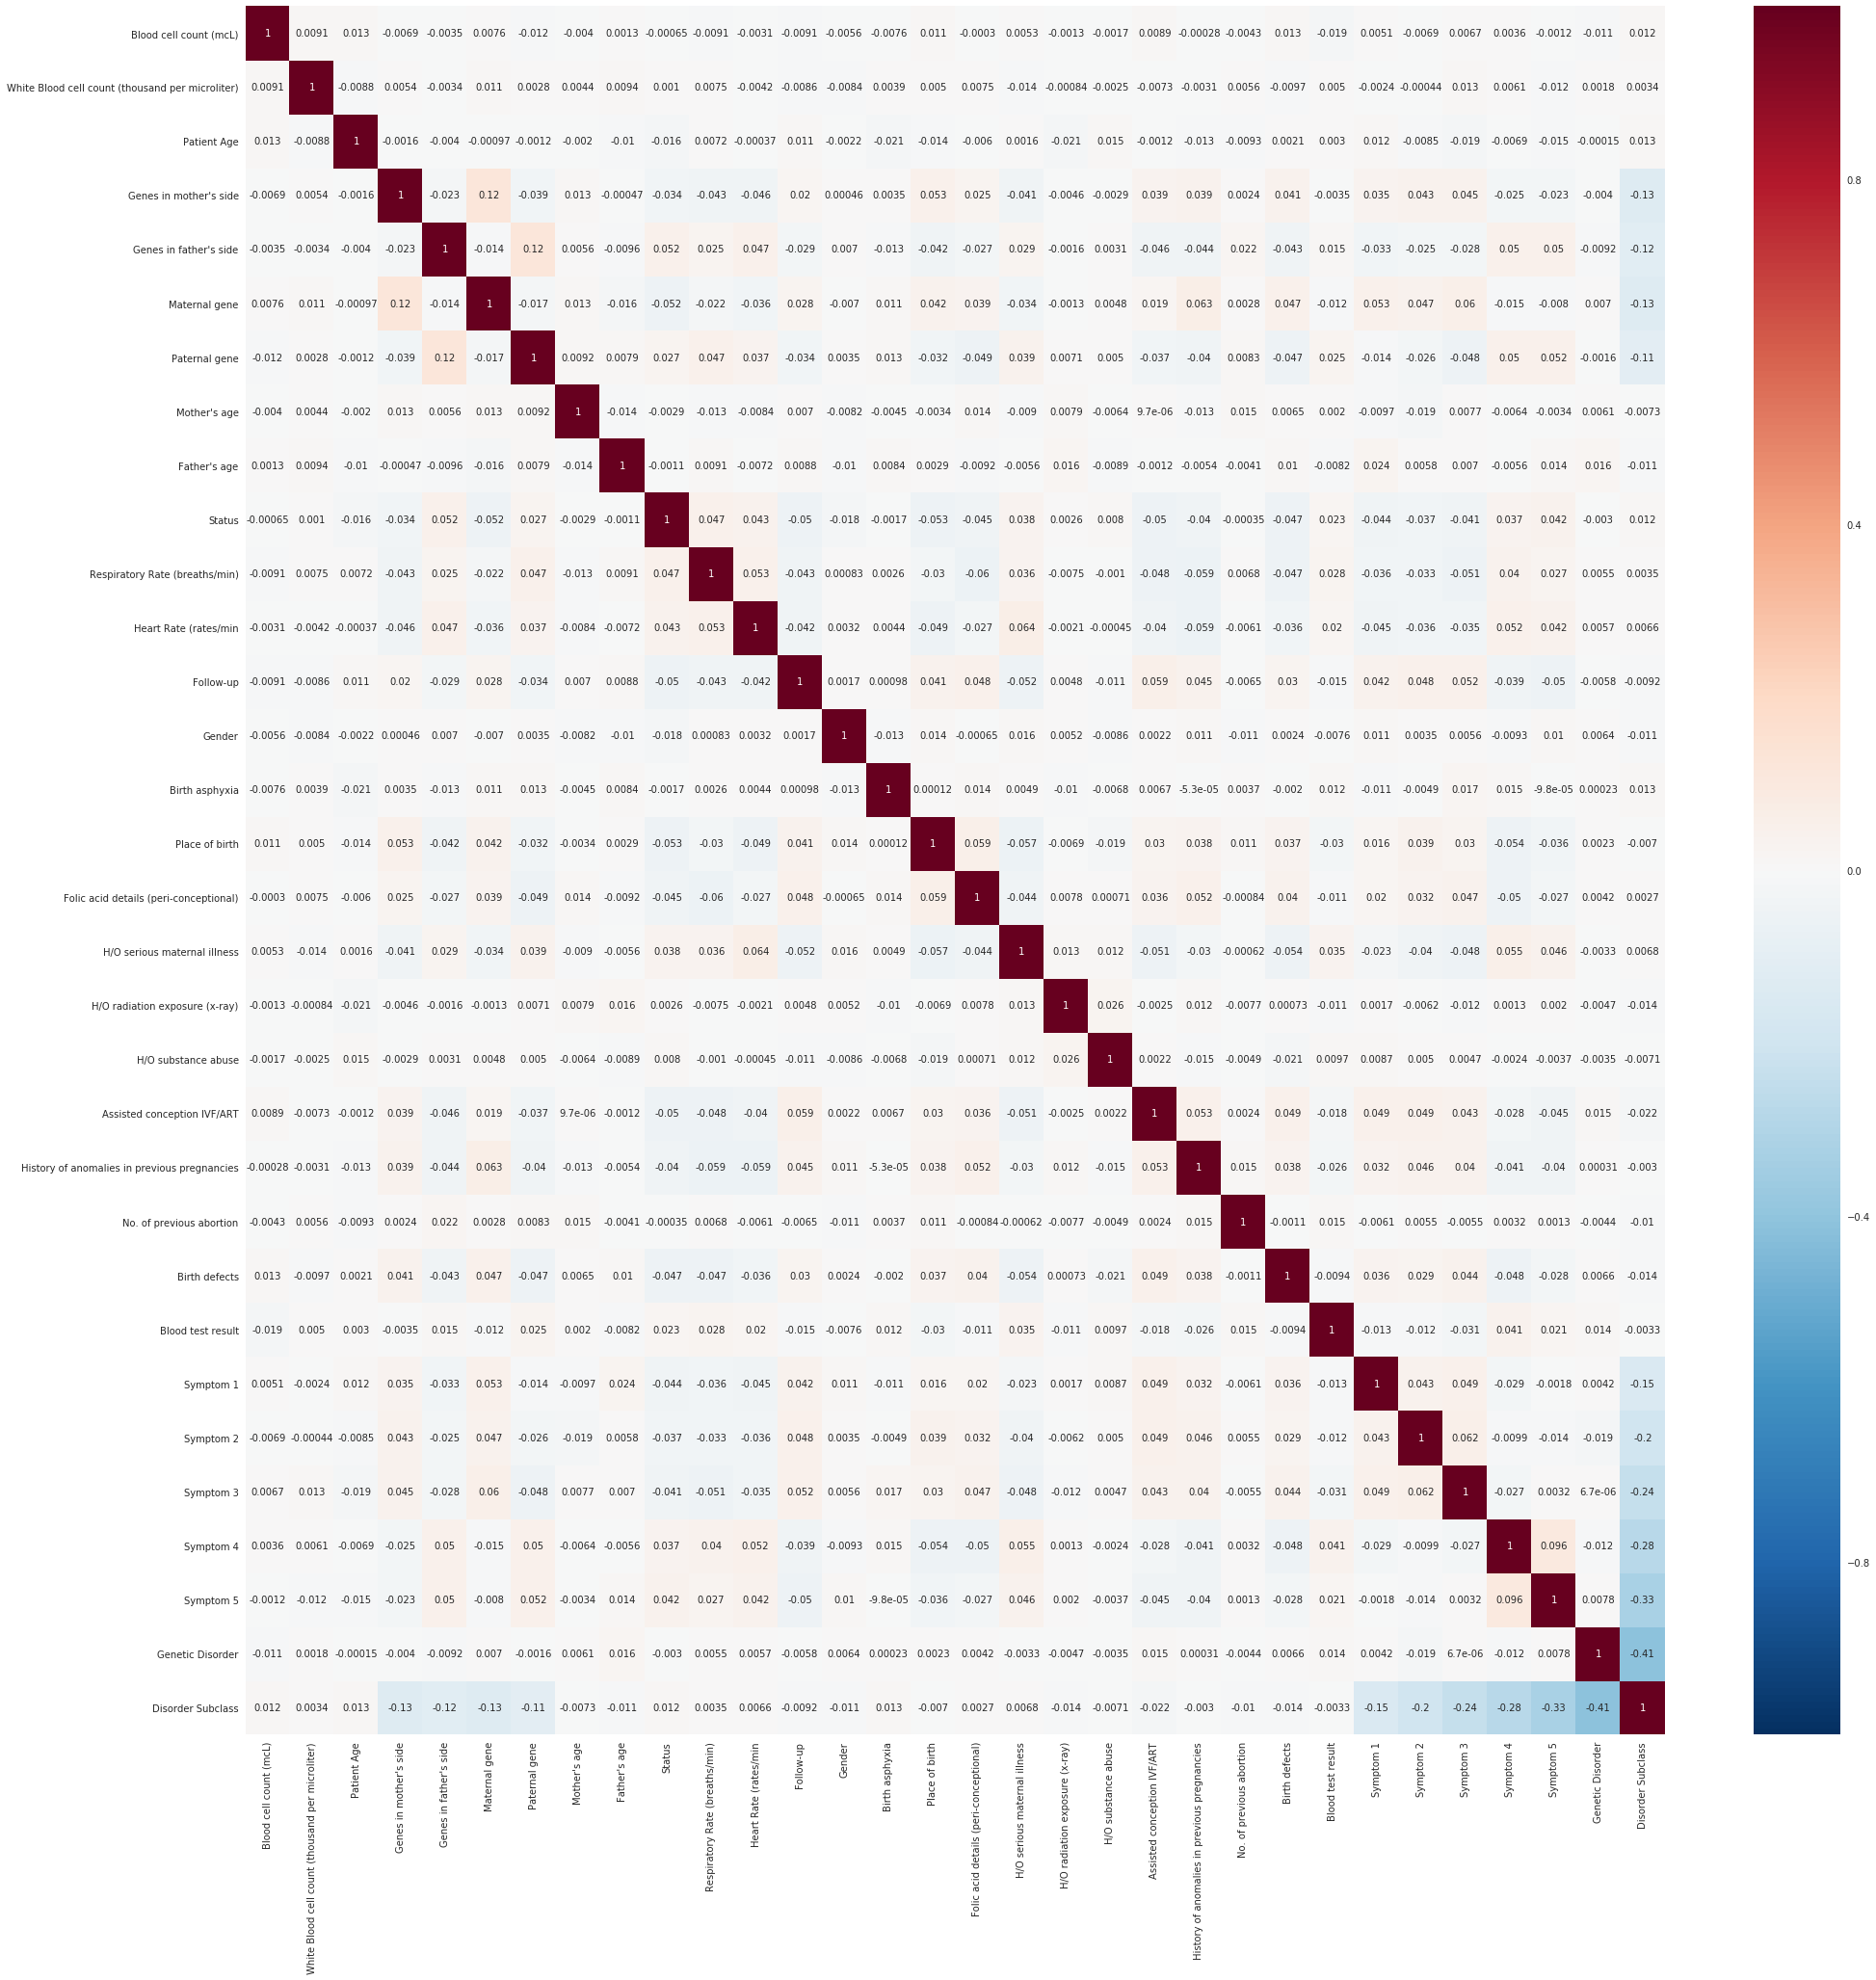

In [80]:
corel = dfc.corr()
fig = plt.subplots(figsize=(33,33))
# vmin, vmax set range
sb.heatmap(corel, annot=True)

<b style="Color:Blue;">Abbreviations Utilized</b>
* MGID - Mitochondrial genetic inheritance disorders
* MuGID - Multifactorial genetic inheritance disorders
* SID - Single-gene inheritance diseases
* CS - Cystic fibrosis
* H - Hemochromatosis
* LHON - Leber's hereditary optic neuropathy
* LS - Leigh syndrome
* MM - Mitochondrial myopathy
* TS - Tay-Sachs

In [82]:
# Calculating Age group counts according to disorder type
age_group_disorder = pd.DataFrame({'Patient Age':dfc['Patient Age'],'Genetic Disorder':dfc['Genetic Disorder']})
age_group_disorder['Genetic Disorder'].replace({0.0:'MGID',1.0:'MuGID',
                                               2.0:'SID'},inplace=True)

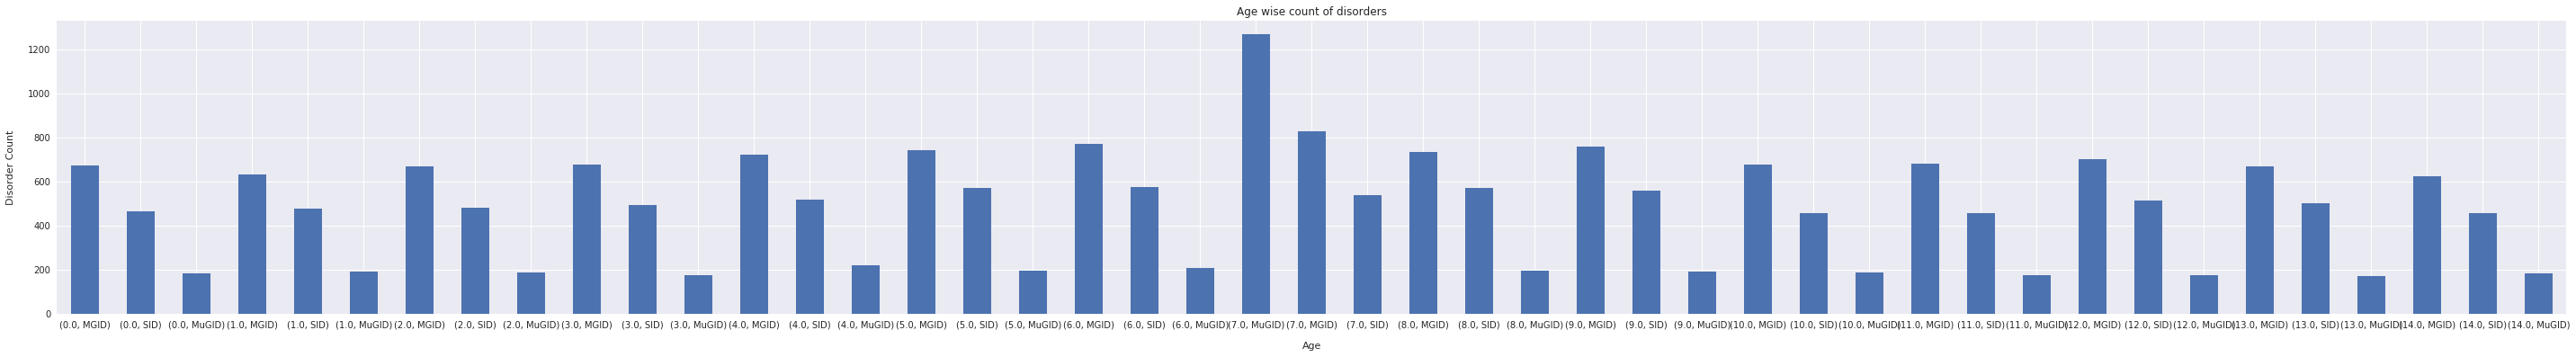

In [83]:
age_group_disorder.groupby('Patient Age')['Genetic Disorder'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Disorder Count", labelpad=14)
plt.title("Age wise count of disorders");

In [ ]:
age_group_disorder.groupby('Patient Age')['Genetic Disorder'].value_counts()

In [85]:
# Calculating gender group count according to disorder
gender_group_disorder = pd.DataFrame({'Gender':dfc['Gender'],'Genetic Disorder':dfc['Genetic Disorder']})
gender_group_disorder['Gender'].replace({0:'Ambiguous',1:'Female',
                                               2:'Male'},inplace=True)
gender_group_disorder['Genetic Disorder'].replace({0.0:'MGID',1.0:'MuGID',
                                               2.0:'SID'},inplace=True)

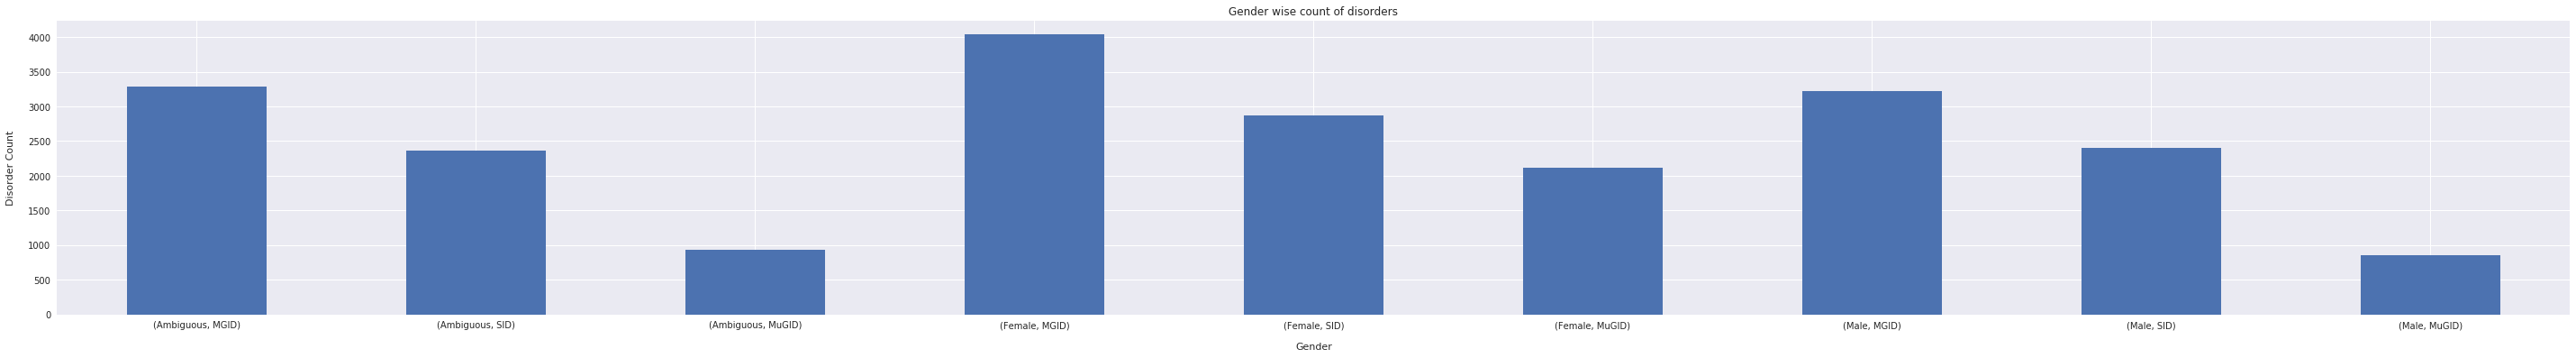

In [86]:
gender_group_disorder.groupby('Gender')['Genetic Disorder'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Disorder Count", labelpad=14)
plt.title("Gender wise count of disorders");

In [87]:
gender_group_disorder.groupby('Gender')['Genetic Disorder'].value_counts()

Gender     Genetic Disorder
Ambiguous  MGID                3289
           SID                 2360
           MuGID                932
Female     MGID                4038
           SID                 2868
           MuGID               2113
Male       MGID                3220
           SID                 2404
           MuGID                859
Name: Genetic Disorder, dtype: int64

In [148]:
# Calculating Age-Gender distribution over Genetic Disorders
age_gender_disorder = pd.DataFrame({'Age':dfc['Patient Age'],'Gender':dfc['Gender'],'Genetic Disorder':dfc['Genetic Disorder']})
age_gender_disorder['Gender'].replace({0:'Ambiguous',1:'Female',
                                               2:'Male'},inplace=True)
age_gender_disorder['Genetic Disorder'].replace({0.0:'MGID',1.0:'MuGID',
                                               2.0:'SID'},inplace=True)

In [157]:
age_gender_disorder.groupby(['Age','Gender'])['Genetic Disorder'].value_counts()

Age   Gender     Genetic Disorder
0.0   Ambiguous  MGID                206
                 SID                 157
                 MuGID                69
      Female     MGID                262
                 SID                 163
                 MuGID                67
      Male       MGID                204
                 SID                 144
                 MuGID                48
1.0   Ambiguous  MGID                181
                 SID                 148
                 MuGID                63
      Female     MGID                247
                 SID                 186
                 MuGID                74
      Male       MGID                205
                 SID                 143
                 MuGID                54
2.0   Ambiguous  MGID                200
                 SID                 158
                 MuGID                59
      Female     MGID                266
                 SID                 159
                 MuGID 

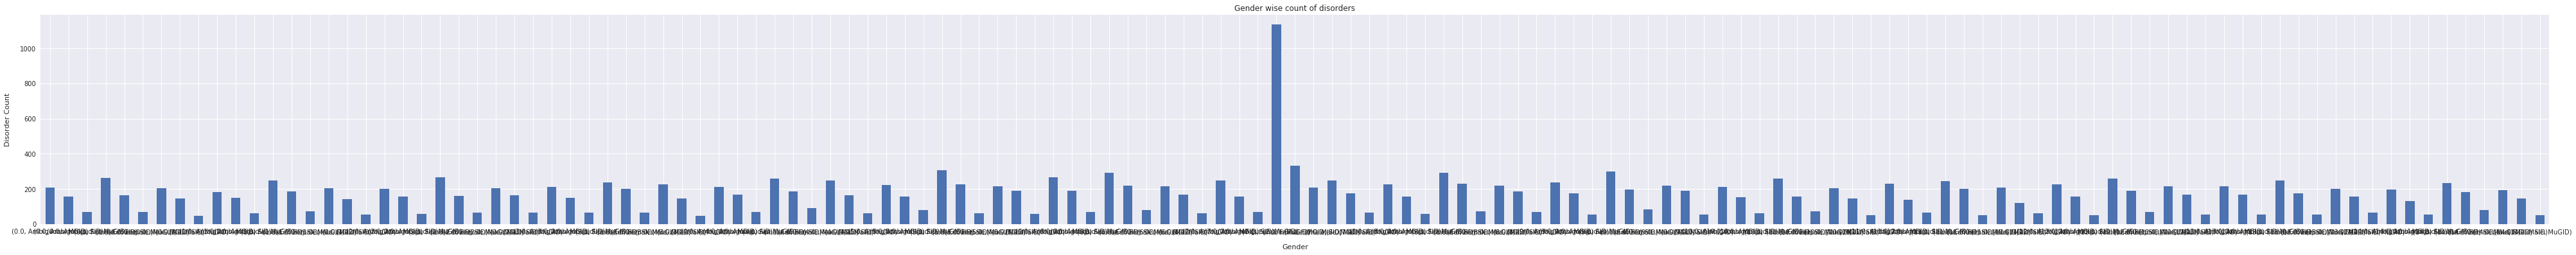

In [158]:
age_gender_disorder.groupby(['Age','Gender'])['Genetic Disorder'].value_counts().plot(kind='bar',figsize=(70, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Disorder Count", labelpad=14)
plt.title("Gender wise count of disorders");

In [88]:
## Calculating Age group counts according to subclass of disorder type
age_group_disorder2 = pd.DataFrame({'Patient Age':dfc['Patient Age'],'Disorder Subclass':dfc['Disorder Subclass']})
age_group_disorder2['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)

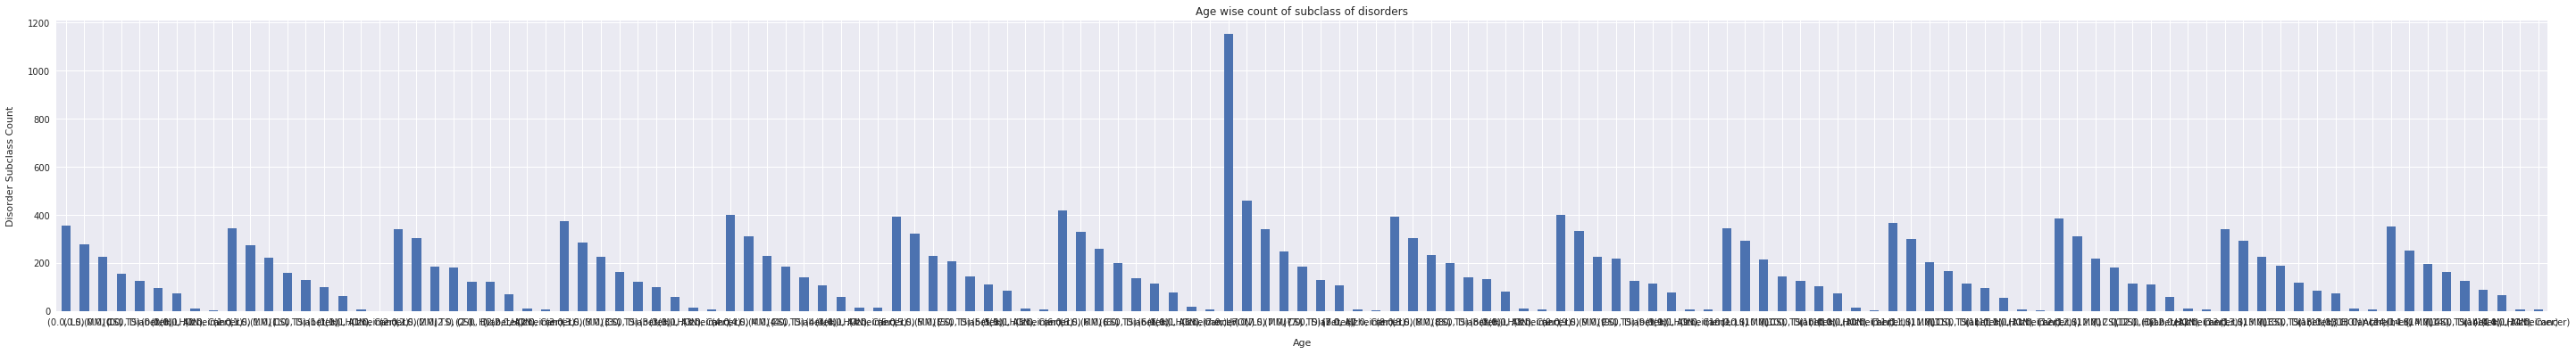

In [89]:
age_group_disorder2.groupby('Patient Age')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Age wise count of subclass of disorders");

In [90]:
# Calculating gender group count according to subclass of disorder
gender_group_disorder2 = pd.DataFrame({'Gender':dfc['Gender'],'Disorder Subclass':dfc['Disorder Subclass']})
gender_group_disorder2['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)
gender_group_disorder2['Gender'].replace({0:'Ambiguous',1:'Female',
                                               2:'Male'},inplace=True)

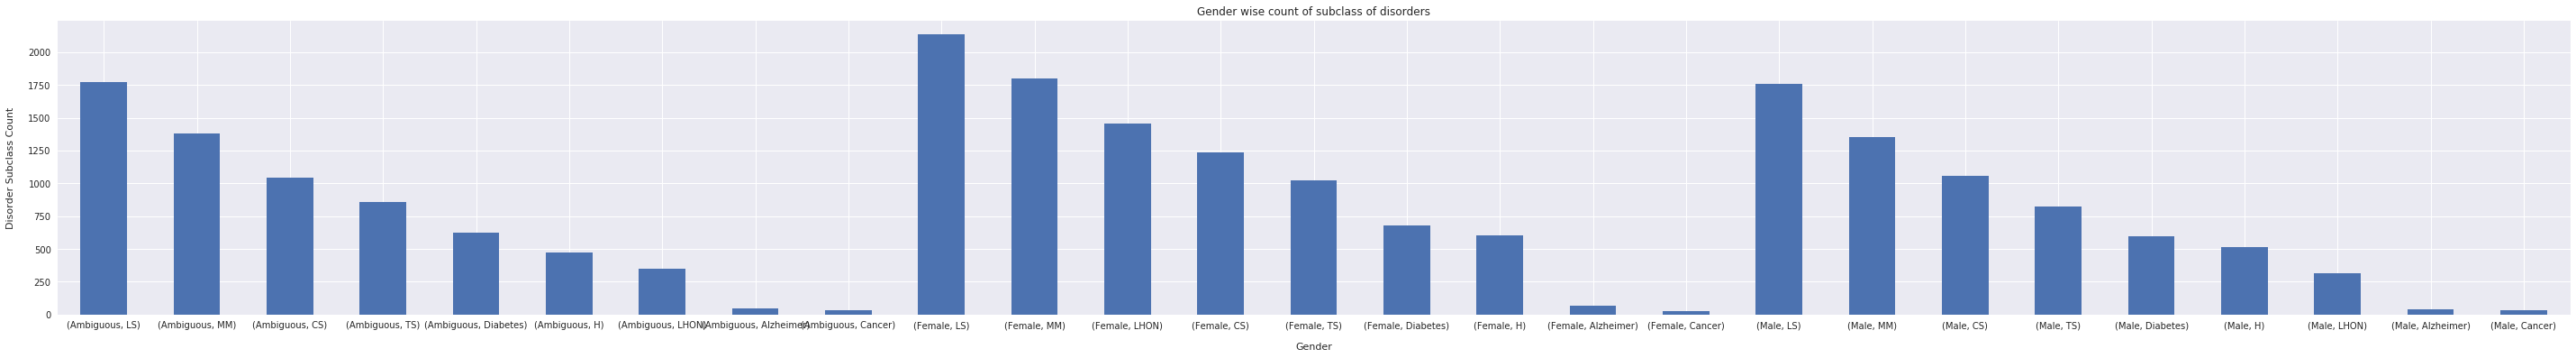

In [91]:
gender_group_disorder2.groupby('Gender')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Gender wise count of subclass of disorders");

In [ ]:
# Calculating Age-Gender distribution over Disorder Subclasses
...

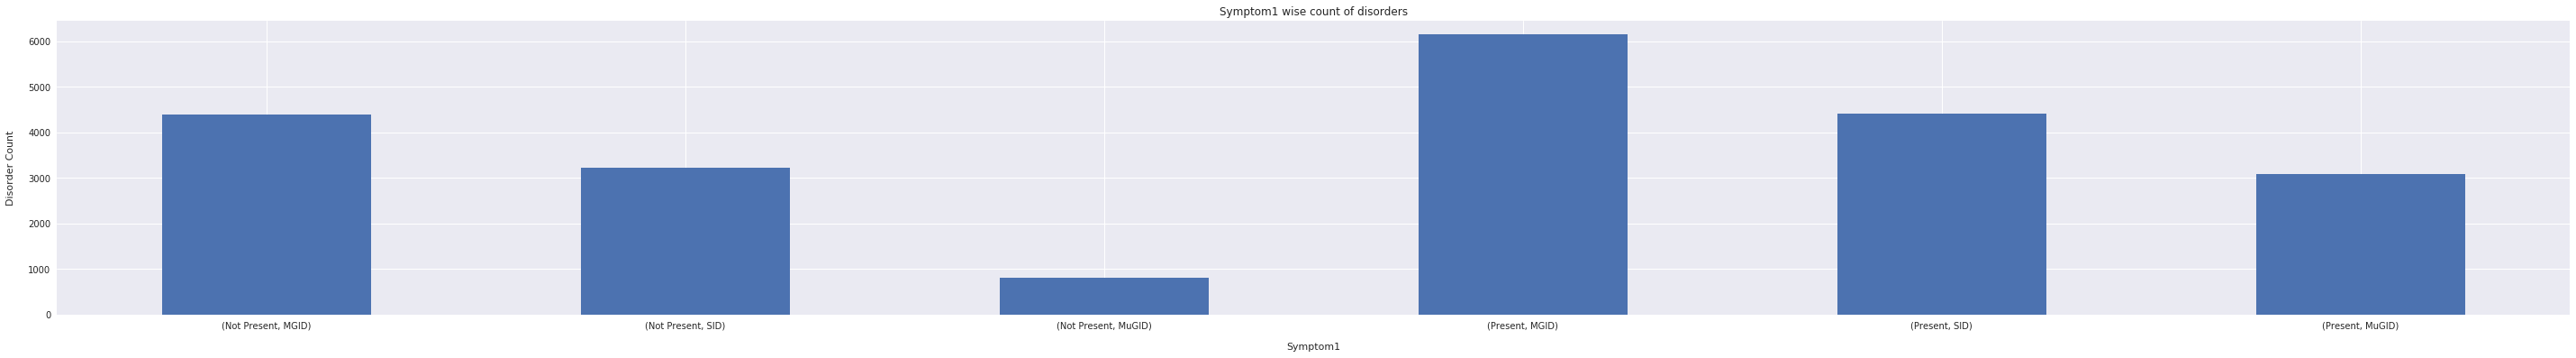

In [92]:
symptom1_disorder = pd.DataFrame({'Symptom 1':dfc['Symptom 1'],'Genetic Disorder':dfc['Genetic Disorder']})
symptom1_disorder['Genetic Disorder'].replace({0.0:'MGID',1.0:'MuGID',
                                               2.0:'SID'},inplace=True)
symptom1_disorder['Symptom 1'].replace({0:'Not Present',1:'Present'},inplace=True)

symptom1_disorder.groupby('Symptom 1')['Genetic Disorder'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Symptom1", labelpad=14)
plt.ylabel("Disorder Count", labelpad=14)
plt.title("Symptom1 wise count of disorders");

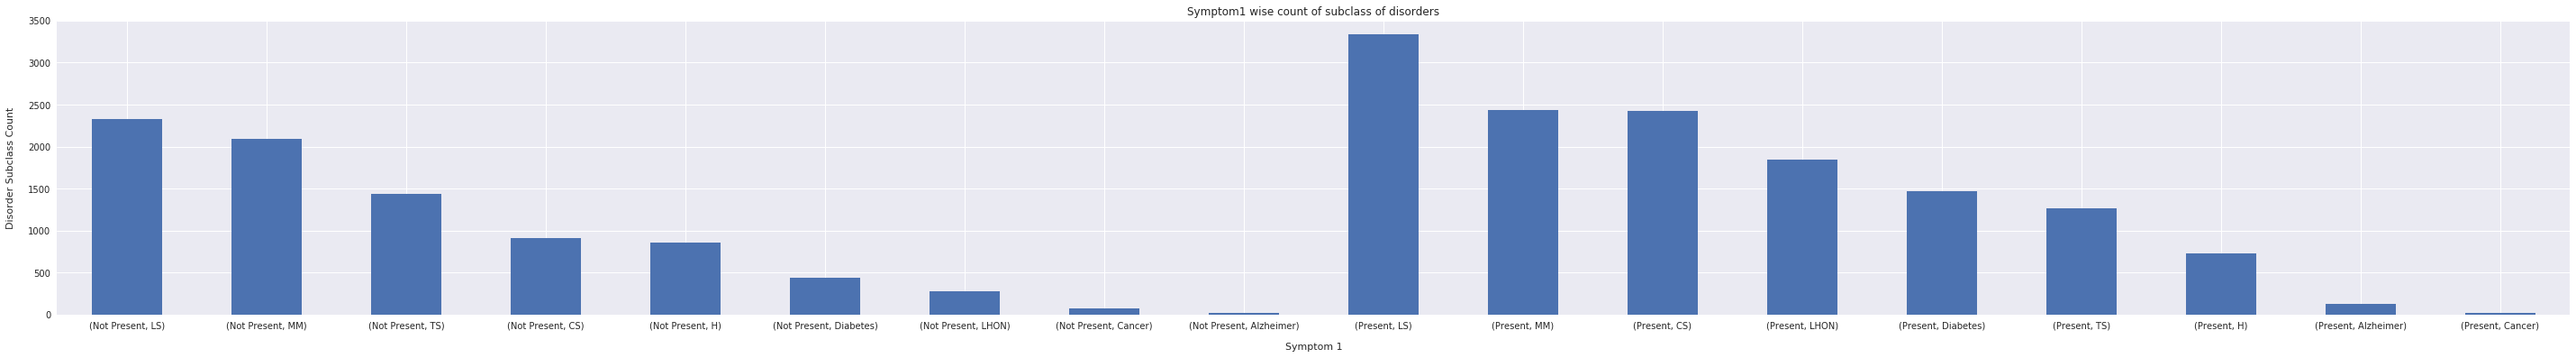

In [93]:
symptom1_disorder = pd.DataFrame({'Symptom 1':dfc['Symptom 1'],'Disorder Subclass':dfc['Disorder Subclass']})
symptom1_disorder['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)
symptom1_disorder['Symptom 1'].replace({0:'Not Present',1:'Present'},inplace=True)

symptom1_disorder.groupby('Symptom 1')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Symptom 1", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Symptom1 wise count of subclass of disorders");

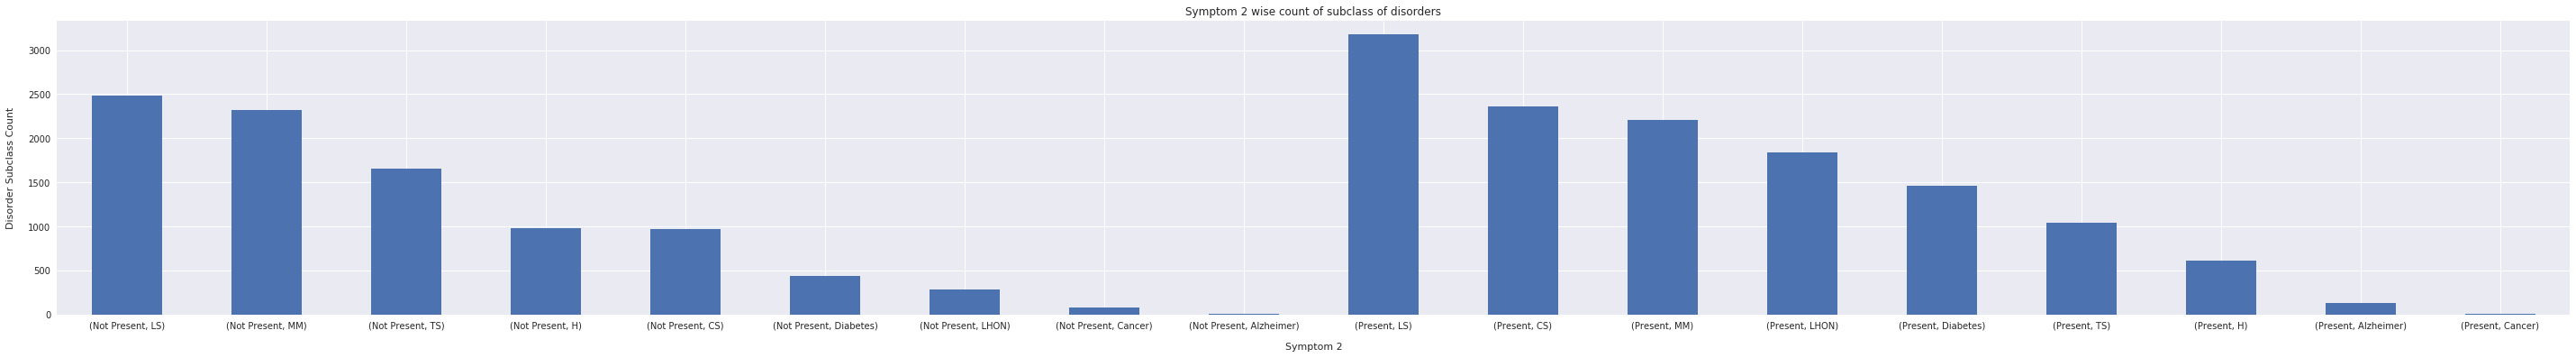

In [94]:
symptom2_disorder = pd.DataFrame({'Symptom 2':dfc['Symptom 2'],'Disorder Subclass':dfc['Disorder Subclass']})
symptom2_disorder['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)
symptom2_disorder['Symptom 2'].replace({0:'Not Present',1:'Present'},inplace=True)

symptom2_disorder.groupby('Symptom 2')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Symptom 2", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Symptom 2 wise count of subclass of disorders");

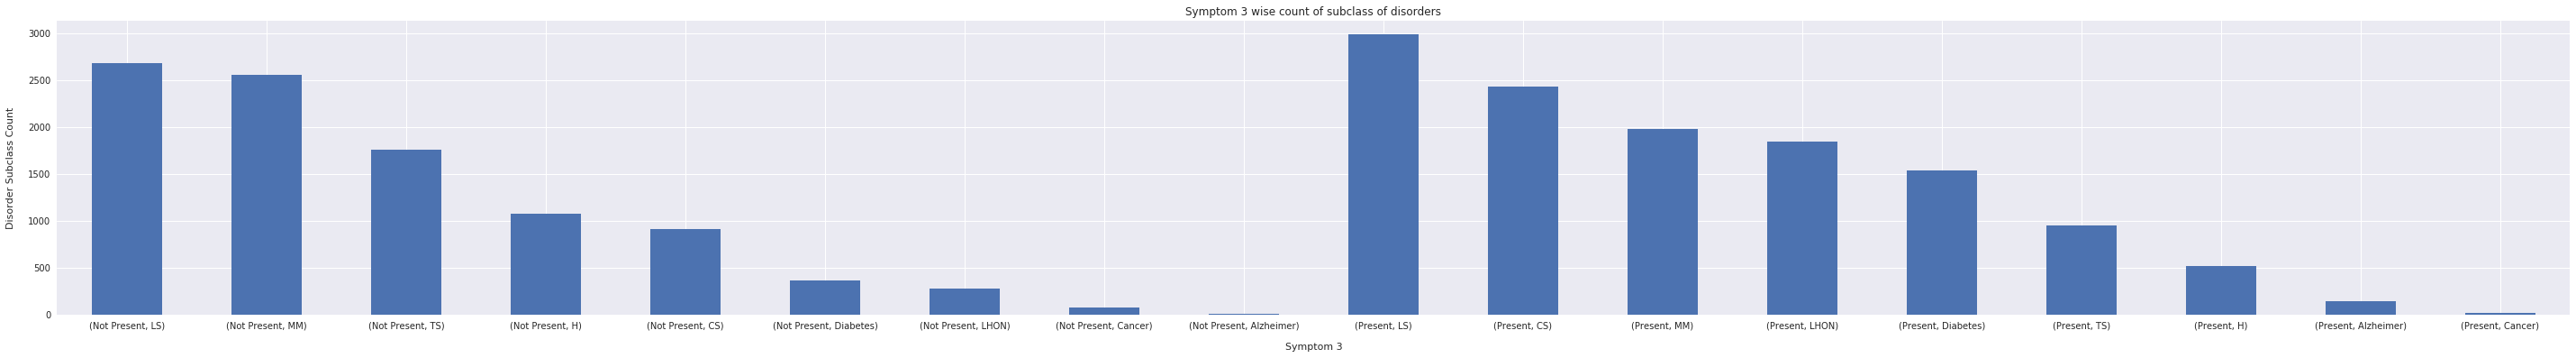

In [95]:
symptom3_disorder = pd.DataFrame({'Symptom 3':dfc['Symptom 3'],'Disorder Subclass':dfc['Disorder Subclass']})
symptom3_disorder['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)
symptom3_disorder['Symptom 3'].replace({0:'Not Present',1:'Present'},inplace=True)

symptom3_disorder.groupby('Symptom 3')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Symptom 3", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Symptom 3 wise count of subclass of disorders");

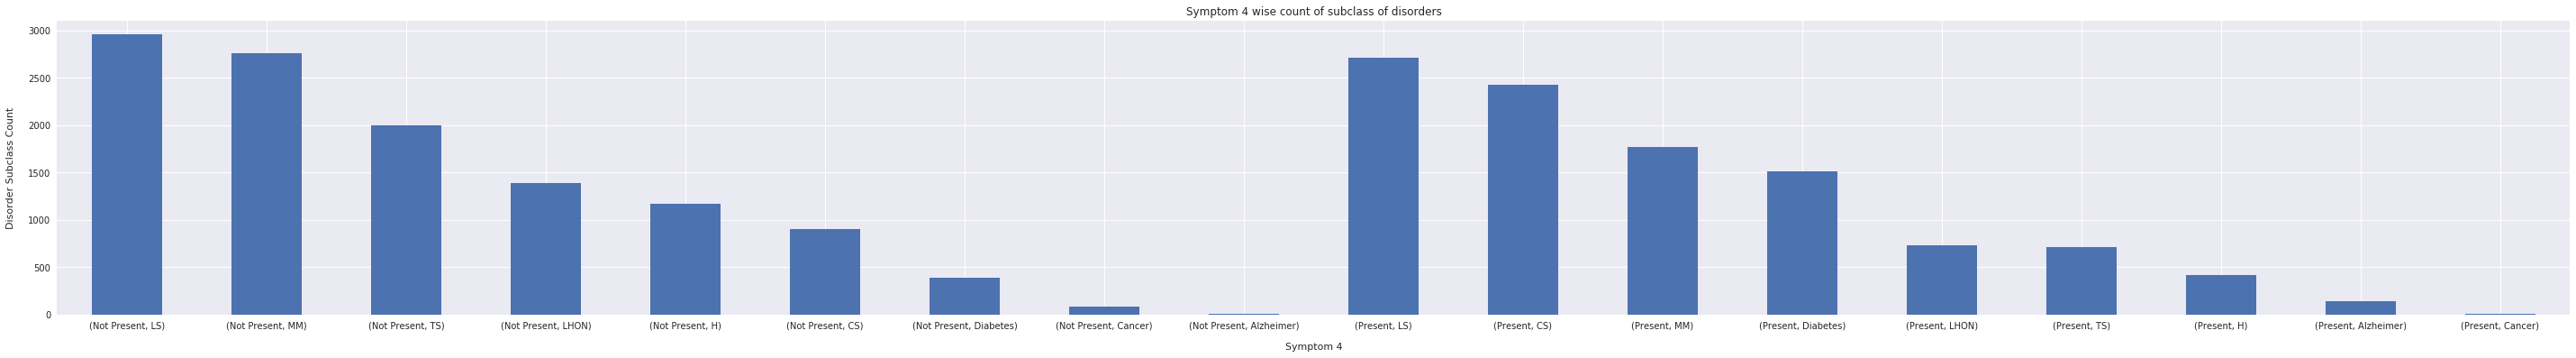

In [96]:
symptom4_disorder = pd.DataFrame({'Symptom 4':dfc['Symptom 4'],'Disorder Subclass':dfc['Disorder Subclass']})
symptom4_disorder['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)
symptom4_disorder['Symptom 4'].replace({0:'Not Present',1:'Present'},inplace=True)

symptom4_disorder.groupby('Symptom 4')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Symptom 4", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Symptom 4 wise count of subclass of disorders");

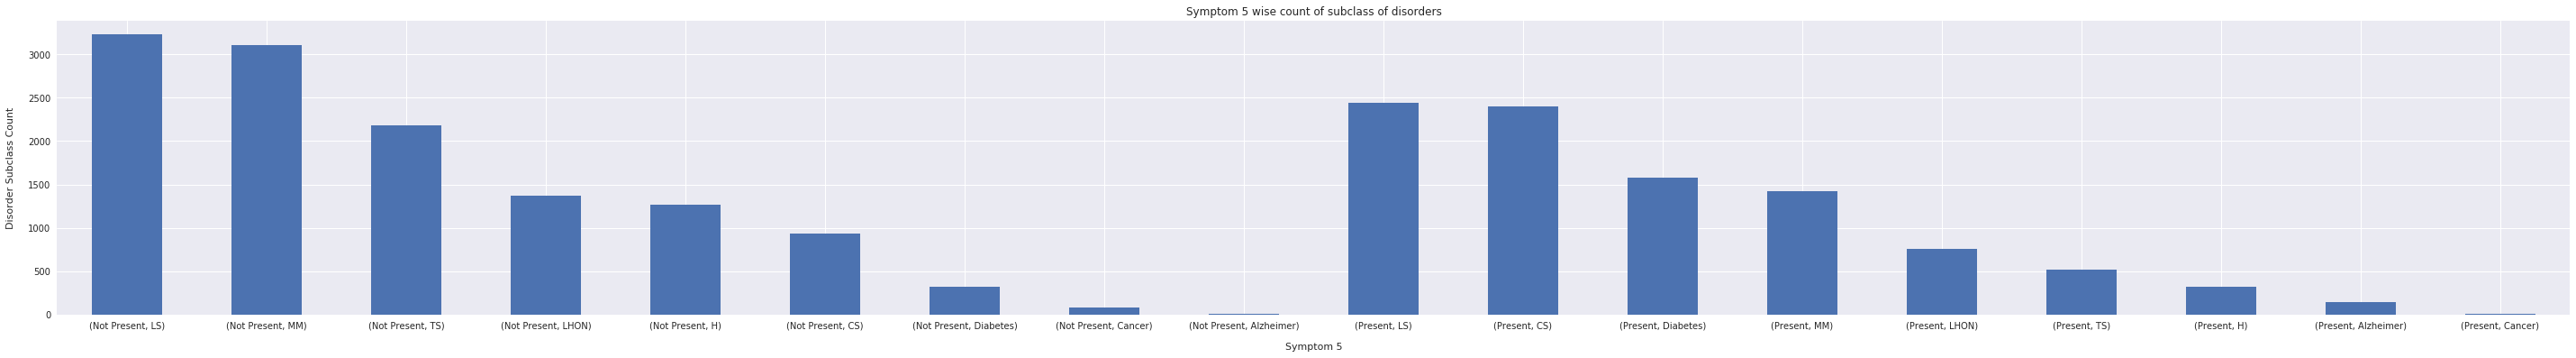

In [97]:
symptom5_disorder = pd.DataFrame({'Symptom 5':dfc['Symptom 5'],'Disorder Subclass':dfc['Disorder Subclass']})
symptom5_disorder['Disorder Subclass'].replace({0.0:'Alzheimer',1.0:'Cancer',2.0:'CS',3.0:'Diabetes'
                                                 ,4.0:'H',5.0:'LHON',6.0:'LS',7.0:'MM',8.0:'TS'},inplace=True)
symptom5_disorder['Symptom 5'].replace({0:'Not Present',1:'Present'},inplace=True)

symptom5_disorder.groupby('Symptom 5')['Disorder Subclass'].value_counts().plot(kind='bar',figsize=(50, 6), rot=0)
plt.xlabel("Symptom 5", labelpad=14)
plt.ylabel("Disorder Subclass Count", labelpad=14)
plt.title("Symptom 5 wise count of subclass of disorders");

<h2 style="Color:Green;">Questions that can be answered from EDA</h2>

* <h4> Presence of which symptom increases the chance of getting Alzheimers?</h4>
* <h4> MGID is most prevelant in which gender group?</h4>
* <h4> To which category of genetic disorder is a male aged 7 years most susceptible to?</h4>

# Model Preparation and Building Section

In [12]:
data = pd.read_csv("preproctrain.csv")
data.head()

,Unnamed: 0,Patient Id,Blood cell count (mcL),White Blood cell count (thousand per microliter),Patient Age,Genes in mother's side,Genes in father's side,Maternal gene,Paternal gene,Mother's age,...,No. of previous abortion,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,10644,PID0x28f0,0.634144,0.503629,0.285714,0.0,0.0,1.0,0.0,0.181818,...,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
1,19445,PID0x1f67,0.272472,0.923686,0.785714,1.0,1.0,0.0,0.0,0.363636,...,0.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0
2,11353,PID0x7157,0.729423,0.525722,0.214286,1.0,0.0,1.0,1.0,0.303030,...,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
3,12092,PID0x7ff8,0.422642,0.527655,0.357143,1.0,1.0,1.0,1.0,0.909091,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
4,18262,PID0x4ff2,0.627963,0.581140,0.785714,0.0,0.0,1.0,1.0,0.363636,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0


In [23]:
data.shape

(15458, 34)

In [24]:
data.drop("Unnamed: 0", inplace=True, axis=1)
data.head()

,Patient Id,Blood cell count (mcL),White Blood cell count (thousand per microliter),Patient Age,Genes in mother's side,Genes in father's side,Maternal gene,Paternal gene,Mother's age,Father's age,...,No. of previous abortion,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x28f0,0.634144,0.503629,0.285714,0.0,0.0,1.0,0.0,0.181818,0.363636,...,3.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
1,PID0x1f67,0.272472,0.923686,0.785714,1.0,1.0,0.0,0.0,0.363636,0.159091,...,0.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0
2,PID0x7157,0.729423,0.525722,0.214286,1.0,0.0,1.0,1.0,0.303030,0.477273,...,2.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
3,PID0x7ff8,0.422642,0.527655,0.357143,1.0,1.0,1.0,1.0,0.909091,0.659091,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0
4,PID0x4ff2,0.627963,0.581140,0.785714,0.0,0.0,1.0,1.0,0.363636,0.386364,...,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0


In [15]:
from sklearn.model_selection import train_test_split

In [26]:
# for col in ["Genes in mother's side","Genes in father's side","Maternal gene","Paternal gene","Status","Respiratory Rate (breaths/min)","Heart Rate (rates/min","Follow-up","Gender","Birth asphyxia","Place of birth","Folic acid details (peri-conceptional)","H/O serious maternal illness","H/O radiation exposure (x-ray)","H/O substance abuse","Assisted conception IVF/ART","History of anomalies in previous pregnancies","Birth defects","Blood test result","Symptom 1","Symptom 2","Symptom 3","Symptom 4","Symptom 5","Genetic Disorder","Disorder Subclass"]:
#     data[col] = data[col].astype('category')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15458 entries, 0 to 15457
Data columns (total 33 columns):
Patient Id                                          14721 non-null object
Blood cell count (mcL)                              15458 non-null float64
White Blood cell count (thousand per microliter)    15458 non-null float64
Patient Age                                         15458 non-null float64
Genes in mother's side                              15458 non-null float64
Genes in father's side                              15458 non-null float64
Maternal gene                                       15458 non-null float64
Paternal gene                                       15458 non-null float64
Mother's age                                        15458 non-null float64
Father's age                                        15458 non-null float64
Status                                              15458 non-null float64
Respiratory Rate (breaths/min)                      15458 non-null 

In [13]:
data.drop("Disorder Subclass",inplace=True,axis=1)
y=data["Genetic Disorder"]
data.drop("Genetic Disorder",inplace=True,axis=1)

In [16]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data,y,test_size=0.2)
Xtrain.drop("Patient Id",inplace=True,axis=1)
Xtest.drop("Patient Id",inplace=True,axis=1)

/home/fztso1/IzODA/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/fztso1/IzODA/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


## Random Forest

In [25]:
Xtrain.drop("Unnamed: 0",inplace=True,axis=1)

/home/fztso1/IzODA/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
History=classifier.fit(Xtrain, Ytrain)

In [19]:
rfpred=classifier.predict(Xtest)

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(classifier, Xtrain,Ytrain, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 58.80% (1.36%)


## validation accuracy

In [27]:
print(accuracy_score(Ytest,rfpred))

0.599935316947


## Test accuracy

In [32]:
dftest = pd.read_csv("preproctest.csv")
y=dftest["Genetic Disorder"]
dftest.drop(["Genetic Disorder", "Disorder Subclass", "Patient Id", "Unnamed: 0"],axis=1,inplace=True)
x = dftest
test_pred=classifier.predict(x)
print(accuracy_score(y,test_pred))

0.588377358491


<Container object of 30 artists>

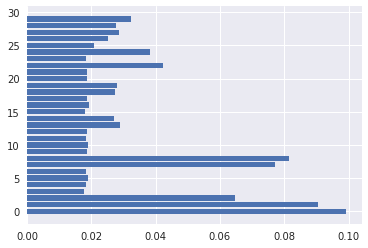

In [110]:
# sorted_idx = classifier.feature_importances_.argsort()
# plt.barh(data.columns[sorted_idx], classifier.feature_importances_[sorted_idx], figsize=(10,10))
# plt.xlabel("Random Forest Feature Importance")
data2 = data.drop("Patient Id", axis=1)
# list(data2.columns)
dex = []
for i in range(30):
    dex.append(i)
plt.barh(np.array(dex), np.array(classifier.feature_importances_))
# classifier.feature_importances_

<h2 style="Color:Blue;">MLP</h2>

In [40]:
from sklearn.neural_network import MLPClassifier

[500, 1000, 1500, 2000]
[0.60090556274256146, 0.59605433376455363, 0.58667529107373872, 0.59282018111254853]


/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [

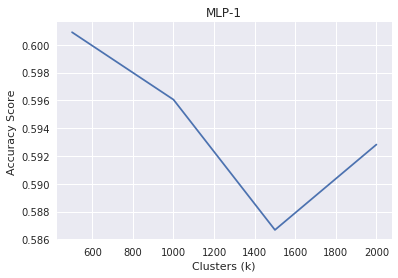

In [42]:
accmlp = []
clusmlp = []
for i in range(500,2100,500):
  mlp = MLPClassifier(max_iter=i, activation='relu')
  mlp.fit(Xtrain, Ytrain)
  Ypred = mlp.predict(Xtest)
  clusmlp.append(i)
  accmlp.append(accuracy_score(Ytest, Ypred))
 
print(clusmlp)
print(accmlp)

plt.title("MLP-1")
plt.xlabel("Clusters (k)")
plt.ylabel("Accuracy Score")
plt.plot(clusmlp,accmlp)
plt.show()

[100, 200, 300, 400]
[0.59249676584734801, 0.59961190168175937, 0.5970245795601552, 0.59767141009055624]


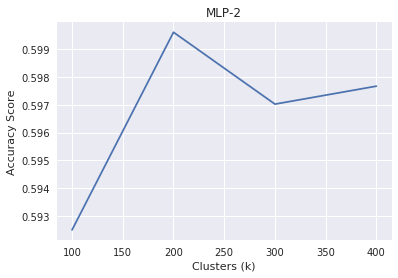

In [48]:
accmlp = []
clusmlp = []
for i in range(100,500,100):
  mlp = MLPClassifier(max_iter=i, activation='relu')
  mlp.fit(Xtrain, Ytrain)
  Ypred = mlp.predict(Xtest)
  clusmlp.append(i)
  accmlp.append(accuracy_score(Ytest, Ypred))
 
print(clusmlp)
print(accmlp)

plt.title("MLP-2")
plt.xlabel("Clusters (k)")
plt.ylabel("Accuracy Score")
plt.plot(clusmlp,accmlp)
plt.show()

[2000, 2100, 2200, 2300, 2400]
[0.60446313065976709, 0.59282018111254853, 0.59379042690815009, 0.59831824062095729, 0.60122897800776198]


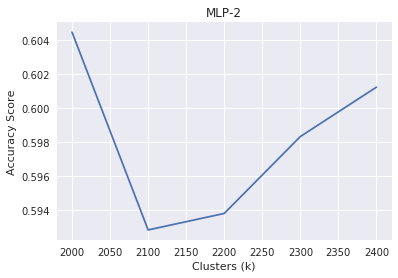

In [50]:
accmlp = []
clusmlp = []
for i in range(2000,2500,100):
  mlp2 = MLPClassifier(max_iter=i, activation='relu')
  mlp2.fit(Xtrain, Ytrain)
  Ypred = mlp2.predict(Xtest)
  clusmlp.append(i)
  accmlp.append(accuracy_score(Ytest, Ypred))
 
print(clusmlp)
print(accmlp)

plt.title("MLP-2")
plt.xlabel("Clusters (k)")
plt.ylabel("Accuracy Score")
plt.plot(clusmlp,accmlp)
plt.show()

[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]
[0.59831824062095729, 0.60446313065976709, 0.61222509702457961, 0.59152652005174644, 0.59152652005174644, 0.60122897800776198, 0.59282018111254853, 0.60122897800776198, 0.59573091849935322, 0.60446313065976709]


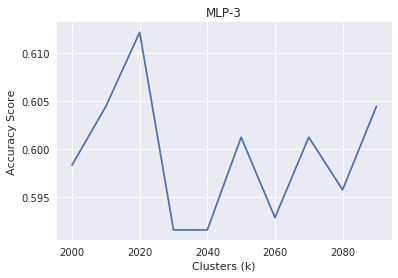

In [52]:
accmlp = []
clusmlp = []
for i in range(2000,2100,10):
  mlp2 = MLPClassifier(max_iter=i, activation='relu')
  mlp2.fit(Xtrain, Ytrain)
  Ypred = mlp2.predict(Xtest)
  clusmlp.append(i)
  accmlp.append(accuracy_score(Ytest, Ypred))
 
print(clusmlp)
print(accmlp)

plt.title("MLP-3")
plt.xlabel("Clusters (k)")
plt.ylabel("Accuracy Score")
plt.plot(clusmlp,accmlp)
plt.show()

[2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024, 2026, 2028]
[0.58344113842173351, 0.59734799482535572, 0.59249676584734801, 0.59573091849935322, 0.59508408796895218, 0.59831824062095729, 0.58893919793014227, 0.59864165588615781, 0.59896507115135833, 0.60381630012936616]


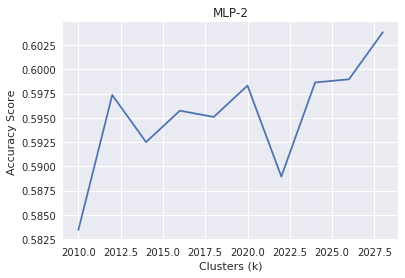

In [53]:
accmlp = []
clusmlp = []
for i in range(2010,2030,2):
  mlp2 = MLPClassifier(max_iter=i, activation='relu')
  mlp2.fit(Xtrain, Ytrain)
  Ypred = mlp2.predict(Xtest)
  clusmlp.append(i)
  accmlp.append(accuracy_score(Ytest, Ypred))
 
print(clusmlp)
print(accmlp)

plt.title("MLP-2")
plt.xlabel("Clusters (k)")
plt.ylabel("Accuracy Score")
plt.plot(clusmlp,accmlp)
plt.show()

In [54]:
mlp = MLPClassifier(max_iter=2020, activation='relu')

In [61]:
dftest = pd.read_csv("preproctest.csv")
dftest.head()

,Unnamed: 0,Patient Id,Blood cell count (mcL),White Blood cell count (thousand per microliter),Patient Age,Genes in mother's side,Genes in father's side,Maternal gene,Paternal gene,Mother's age,...,No. of previous abortion,Birth defects,Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2792,PID0x6491,0.363340,0.756250,0.071429,0.0,0.0,0.0,0.0,0.727273,...,3.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0
1,4223,PID0x69a6,0.491251,0.292892,0.357143,0.0,0.0,1.0,0.0,0.030303,...,3.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0
2,20273,PID0x5be1,0.605699,0.687125,0.142857,0.0,1.0,0.0,0.0,0.575758,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,8.0
3,5958,PID0x3eae,0.426345,1.000000,0.571429,0.0,0.0,1.0,0.0,0.333333,...,4.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,4.0
4,9430,PID0x124c,0.744055,0.549389,0.642857,1.0,0.0,1.0,1.0,0.393939,...,3.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0


In [63]:
y=dftest["Genetic Disorder"]
dftest.drop(["Genetic Disorder", "Disorder Subclass", "Patient Id", "Unnamed: 0"],axis=1,inplace=True)
x = dftest

## accuracy on test data

In [64]:
mlp.fit(Xtrain, Ytrain)
Ypred = mlp.predict(x)
accuracy_score(y, Ypred)

0.60120754716981128

## Logistic Regression 

In [33]:
from sklearn import linear_model

In [34]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
YpredLg = lm.predict(Xtest)

## validation accuracy

In [69]:
accuracy_score(Ytest, YpredLg)

0.52684346701164297

In [35]:
accuracy_score(y,lm.predict(x))

0.5388679245283019

<h2 style="Color:Blue">Adaboost</h2>

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
Xtest.drop("Unnamed: 0",inplace=True,axis=1)

/home/fztso1/IzODA/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1.5)

model = abc.fit(Xtrain, Ytrain)

YpredAb = model.predict(Xtest)

## validation accuracy

In [137]:
accuracy_score(Ytest, YpredAb)

0.53007761966364808

In [43]:
accuracy_score(y,model.predict(x))

0.53554716981132078

## Modified Adaboost

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

class customMLPClassifer(MLPClassifier):
    def resample_with_replacement(self, X_train, y_train, sample_weight):

        # normalize sample_weights if not already
        sample_weight = sample_weight / sample_weight.sum(dtype=np.float64)

        X_train_resampled = np.zeros((len(X_train), len(X_train[0])), dtype=np.float32)
        y_train_resampled = np.zeros((len(y_train)), dtype=np.int)
        for i in range(len(X_train)):
            # draw a number from 0 to len(X_train)-1
            draw = np.random.choice(np.arange(len(X_train)), p=sample_weight)

            # place the X and y at the drawn number into the resampled X and y
            X_train_resampled[i] = X_train[draw]
            y_train_resampled[i] = y_train[draw]

        return X_train_resampled, y_train_resampled


    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            X, y = self.resample_with_replacement(X, y, sample_weight)

        return self._fit(X, y, incremental=(self.warm_start and
                                            hasattr(self, "classes_")))


adabooster = AdaBoostClassifier(base_estimator=customMLPClassifer())

adabooster.fit(Xtrain,Ytrain)

In [ ]:
YpredAb=adabooster.predict(x)
acc=accuracy_score(y,YpredAb)

## test accuracy

In [46]:
print(acc)

0.530018265819212
